In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx

df = pd.read_csv('bank.csv',sep=';')
df0 = df.copy(deep=True)

In [2]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [3]:
df.age = df.age.apply(lambda x: 0 if x < 25 else(1 if x < 35 else(2 if x < 50 else(3 if x < 65 else 4))))

#df.job = df.job.apply(lambda x: 0 if x == 'unemployed' else(1 if x == 'services' \
#                            else(2 if x == 'management' else(3 if x == 'blue-collar' \
#                                else(4 if x == 'self-employed' else(5 if x == 'technician' \
#                                    else(6 if x == 'entrepreneur' else(7 if x == 'admin.' \
#                        else(8 if x =='student' else(9 if x == 'housemaid' \
#                            else(10 if x == 'retired' else 11)))))))))))

#df.job = df.job.apply(lambda x: 0 if x == 'unemployed' or 'unknown' else(1 if x == 'services' \
#                        or x == 'management' or x == 'admin.' else(2 if x == 'blue-collar' or x == 'technician' \
#                                    or x == 'housemaid' else(3 if x == 'self-employed' or x == 'entrepreneur' \
#                                        else(4 if x == 'student' else 5)))))

df.job = df.job.apply(lambda x: 0 if x == 'student' else(2 if x == 'retired' else(3 if x == 'unemployed' or x == 'unknown' else 1)))


df.marital = df.marital.apply(lambda x: 0 if x == 'single' else(1 if x == 'married' else 2))

df.education = df.education.apply(lambda x: 0 if x == 'primary' else(1 if x == 'secondary' else(2 if x == 'tertiary' else 3)))

df.default = df.default.apply(lambda x: 0 if x == 'no' else 1)

df.balance = df.balance.apply(lambda x: 0 if x < 0 else(1 if x < 69. else(2 if x < 444. else(3 if x < 1480 else 4))))

df.housing = df.housing.apply(lambda x: 0 if x == 'no' else 1)

df.loan = df.loan.apply(lambda x: 0 if x == 'no' else 1)

df.contact = df.contact.apply(lambda x: 0 if x == 'telephone' else(1 if x == 'cellular' else 2))

df.duration = df.duration.apply(lambda x: 0 if x < 104. else(1 if x < 185 else(2 if x < 329 else 3)))

df.pdays = df.pdays.apply(lambda x: 0 if x < 50 else 0)

df.poutcome = df.poutcome.apply(lambda x: 0 if x == 'failure' else(1 if x == 'success' else 2))

df.y = df.y.apply(lambda x: 0 if x == 'no' else 1)

df.drop(columns = ['day','month'],inplace=True)


In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,1,3,1,0,0,4,0,0,1,0,1,0,0,2,0
1,1,1,1,1,0,4,1,1,1,2,1,0,4,0,0
2,2,1,0,2,0,3,1,0,1,2,1,0,1,0,0
3,1,1,1,2,0,3,1,1,2,2,4,0,0,2,0
4,3,1,1,1,0,1,1,0,2,2,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,1,1,1,1,0,0,1,0,1,3,5,0,0,2,0
4517,3,1,1,2,1,0,1,1,2,1,1,0,0,2,0
4518,3,1,1,1,0,2,0,0,1,1,11,0,0,2,0
4519,1,1,1,1,0,3,0,0,1,1,4,0,3,2,0


In [5]:
df0.drop(columns = ['day','month'],inplace=True)
df0 = pd.get_dummies(df0)
df0

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,33,4789,220,1,339,4,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
2,35,1350,185,1,330,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,30,1476,199,4,-1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
4,59,0,226,1,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,329,5,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4517,57,-3313,153,1,-1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
4518,57,295,151,11,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4519,28,1137,129,4,211,3,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [6]:
genvars = df.drop(columns=['previous','pdays','campaign','duration','contact','loan','default','poutcome','y'])
genvars

,age,job,marital,education,balance,housing
0,1,3,1,0,4,0
1,1,1,1,1,4,1
2,2,1,0,2,3,1
3,1,1,1,2,3,1
4,3,1,1,1,1,1
...,...,...,...,...,...,...
4516,1,1,1,1,0,1
4517,3,1,1,2,0,1
4518,3,1,1,1,2,0
4519,1,1,1,1,3,0


In [7]:
df.balance.unique()

array([4, 3, 1, 2, 0])

In [8]:
# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40
age_beta4 = 0.20

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3,age_beta4],
                    [age_beta1,age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta2,age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta3,age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta4,age_beta3,age_beta2,age_beta1,age_alpha0]])


# job

job_alpha0 = 0.90 # self
job_beta_wf = 0.60 # workforce
job_beta_nwf = 0.60 # not worforce

#aff_job = np.array([[job_alpha0, job_beta_wf , job_beta_wf , job_beta_wf , job_beta_nwf, job_beta_nwf],
#                    [job_beta_nwf, job_alpha0, job_beta_wf, job_beta_wf, job_beta_nwf, job_beta_nwf],
#                    [job_beta_nwf, job_beta_wf, job_alpha0, job_beta_wf, job_beta_nwf, job_beta_nwf],
#                    [job_beta_nwf, job_beta_wf, job_beta_wf, job_alpha0, job_beta_nwf, job_beta_nwf],
#                    [job_beta_nwf, job_beta_wf, job_beta_wf, job_beta_wf, job_alpha0, job_beta_nwf],
#                    [job_beta_nwf, job_beta_wf, job_beta_wf, job_beta_wf, job_beta_nwf, job_alpha0]])

# employment
emp_alpha0 = 0.90 # self
emp_beta_wf = 0.75 # beta workforce / employed / unemployed vs student
emp_beta_ret = 0.70 # beta retired vs workforce
emp_beta_sr = 0.20 # gen gap student / retired

aff_job = np.array([[emp_alpha0,emp_beta_wf,emp_beta_sr,emp_beta_wf],
                    [emp_beta_wf,emp_alpha0,emp_beta_ret,emp_beta_wf],
                    [emp_beta_sr,emp_beta_ret,emp_alpha0,emp_beta_ret],
                    [emp_beta_wf,emp_beta_wf,emp_beta_ret,emp_alpha0]])


# marital

mar_alpha0 = 0.85
mar_beta1 = 0.65

aff_mar = np.array([[mar_alpha0, mar_beta1, mar_beta1],
                    [mar_beta1, mar_alpha0, mar_beta1],
                    [mar_beta1, mar_beta1, mar_alpha0]])

# education
edu_alpha0 = 0.85
edu_beta1 = 0.70
edu_beta2 = 0.55
edu_beta3 = 0.40

aff_edu = np.array([[edu_alpha0,edu_beta1,edu_beta2,edu_beta3],
                    [edu_beta1,edu_alpha0,edu_beta1,edu_beta2],
                    [edu_beta2,edu_beta1,edu_alpha0,edu_beta1],
                    [edu_beta3,edu_beta2,edu_beta1,edu_alpha0]])


# balance
inc_alpha0 = 0.85
inc_beta1 = 0.70
inc_beta2 = 0.60
inc_beta3 = 0.50
inc_beta4 = 0.40
inc_beta5 = 0.25

aff_bal = np.array([[inc_alpha0,inc_beta1,inc_beta2,inc_beta3,inc_beta4],
                    [inc_beta1,inc_alpha0,inc_beta1,inc_beta2,inc_beta3],
                    [inc_beta2,inc_beta1,inc_alpha0,inc_beta1,inc_beta2],
                    [inc_beta3,inc_beta2,inc_beta1,inc_alpha0,inc_beta1],
                    [inc_beta4,inc_beta3,inc_beta2,inc_beta2,inc_alpha0]])

# housing
hous_alpha0 = 0.60
hous_beta1 = 0.40

aff_hous = np.array([[hous_alpha0,hous_beta1],
                     [hous_beta1,hous_alpha0]])

# outcome

y_alpha0 = 0.95
y_beta1 = 0.25

aff_y = np.array([[y_alpha0,y_beta1],
                  [y_beta1,y_alpha0]])

aff = {}
aff = {0:aff_age, 1:aff_job ,2:aff_mar ,3:aff_edu ,4:aff_bal ,5:aff_hous}

In [9]:
x = genvars.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v) 

In [10]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0


In [11]:
A = A + A.T - np.diag(np.diag(A))
np.sum(A) / 2

1286391.0

In [12]:
G = nx.from_numpy_matrix(A)

In [13]:
nx.is_connected(G)

True

In [14]:
# nx.draw(G,node_size=20)

In [15]:
features = pd.Series(df.y)

In [16]:
legend = features.to_dict()

In [17]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

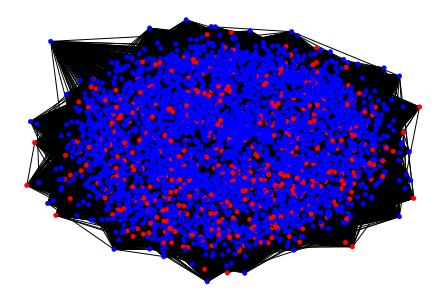

In [18]:
pos = nx.spring_layout(G)
nx.draw(G,pos,labels=features,node_size=20,node_color=color_map,with_labels=False)
plt.show()

In [19]:
df0.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_no',
       'y_yes'],
      dtype='object')

In [31]:
import dgl
import dgl.nn as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F

G_dgl = dgl.from_networkx(G)
feat = df0.drop(columns=['y_no','y_yes'])

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.8)
G_dgl.ndata['label'] = torch.tensor(features)

In [32]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [43]:
# Contruct a two-layer GNN model

class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats_1, hid_feats_2, hid_feats_3, out_feats):
        super().__init__()
        self.conv1 = dglnn.pytorch.conv.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats_1, aggregator_type='mean')
        
        self.conv2 = dglnn.pytorch.conv.SAGEConv(
            in_feats=hid_feats_1, out_feats=hid_feats_2, aggregator_type='mean')
        
        self.conv3 = dglnn.pytorch.conv.SAGEConv(
            in_feats=hid_feats_2, out_feats=hid_feats_3, aggregator_type='mean')
        
        self.conv4 = dglnn.pytorch.conv.SAGEConv(
            in_feats=hid_feats_3, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.normalize(h, p=2, dim=1)
        h = F.relu(h)
        h = self.conv2(graph, h)
        h = F.normalize(h, p=2, dim=1)
        h = F.relu(h)
        h = self.conv3(graph, h)
        h = F.normalize(h, p=2, dim=1)
        h = F.relu(h)
        h = self.conv4(graph,h)
        h = F.normalize(h, p=2, dim=1)
        h = F.log_softmax(h,dim=1)
        return h

In [44]:
def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [45]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [46]:
#def relu(x):
#    return np.max(0,x)

#relu = nn.ReLU(inplace=False)

In [47]:
#softmax = nn.Softmax()

In [48]:
model = SAGE(in_feats=n_features, hid_feats_1=100, hid_feats_2 = 60, hid_feats_3=20, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
for epoch in range(150):
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    if epoch % 10 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val))


    # Save model if necessary.  Omitted in this example.

Epoch: 0, train loss: 1.3996, validation loss: 1.3882, training accuracy: 0.1136, validation accuracy: 0.1216
Epoch: 10, train loss: 0.7265, validation loss: 0.7337, training accuracy: 0.2908, validation accuracy: 0.3170
Epoch: 20, train loss: 0.5168, validation loss: 0.5243, training accuracy: 0.8864, validation accuracy: 0.8784
Epoch: 30, train loss: 0.4074, validation loss: 0.4182, training accuracy: 0.8864, validation accuracy: 0.8784
Epoch: 40, train loss: 0.3822, validation loss: 0.3935, training accuracy: 0.8864, validation accuracy: 0.8784
Epoch: 50, train loss: 0.3794, validation loss: 0.3907, training accuracy: 0.8864, validation accuracy: 0.8784
Epoch: 60, train loss: 0.3800, validation loss: 0.3911, training accuracy: 0.8864, validation accuracy: 0.8784
Epoch: 70, train loss: 0.3795, validation loss: 0.3907, training accuracy: 0.8864, validation accuracy: 0.8784
Epoch: 80, train loss: 0.3796, validation loss: 0.3905, training accuracy: 0.8864, validation accuracy: 0.8784
Ep

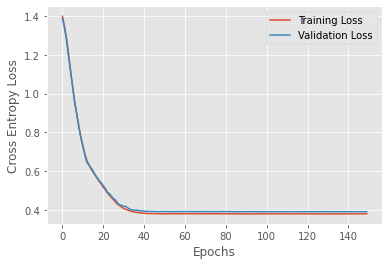

In [49]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

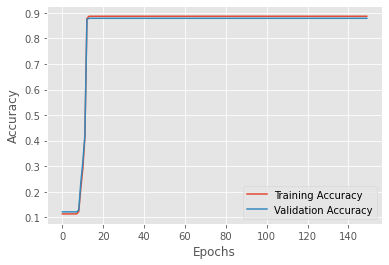

In [50]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))

Classification Accuracy validation set 0.8783930510314875
-------------------------------------------------------------
Classification Accuracy training set 0.8863888888888889
-------------------------------------------------------------
Confusion Matrix validation set:
[[809   0]
 [112   0]]
-------------------------------------------------------------
Confusion Matrix training set:
[[3191    0]
 [ 409    0]]


In [32]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

roc_auc_score(val_lab,indices_val)
#plot_roc_curve(logits, X_test, y_test) 

0.5083788892862617

In [33]:
logits

tensor([[-0.2178, -1.6310],
        [-0.2260, -1.5981],
        [-0.2275, -1.5921],
        ...,
        [-0.2177, -1.6315],
        [-0.2273, -1.5929],
        [-0.2626, -1.4657]], grad_fn=<LogSoftmaxBackward>)

In [53]:
from sklearn.model_selection import train_test_split
f =  pd.get_dummies(features)
#x = df.drop(columns='y')
x_train, x_test, y_train, y_test = train_test_split(feat,f, test_size = 0.6, shuffle=True)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=50, batch_size=1)

Epoch 1/50
1808/1808 [==============================] - 7s 4ms/step - loss: 12.5606 - accuracy: 0.6771 - val_loss: 0.8676 - val_accuracy: 0.8374
Epoch 2/50
1808/1808 [==============================] - 4s 2ms/step - loss: 1.4193 - accuracy: 0.8222 - val_loss: 0.8461 - val_accuracy: 0.8861
Epoch 3/50
1808/1808 [==============================] - 4s 2ms/step - loss: 1.2315 - accuracy: 0.8490 - val_loss: 0.9844 - val_accuracy: 0.7582
Epoch 4/50
1808/1808 [==============================] - 4s 2ms/step - loss: 0.8915 - accuracy: 0.8645 - val_loss: 1.1416 - val_accuracy: 0.8879
Epoch 5/50
1808/1808 [==============================] - 4s 2ms/step - loss: 0.6284 - accuracy: 0.8717 - val_loss: 0.4032 - val_accuracy: 0.8850
Epoch 6/50
1808/1808 [==============================] - 4s 2ms/step - loss: 0.3916 - accuracy: 0.8693 - val_loss: 0.3601 - val_accuracy: 0.8887
Epoch 7/50
1808/1808 [==============================] - 4s 2ms/step - loss: 0.3637 - accuracy: 0.8789 - val_loss: 0.3760 - val_accuracy

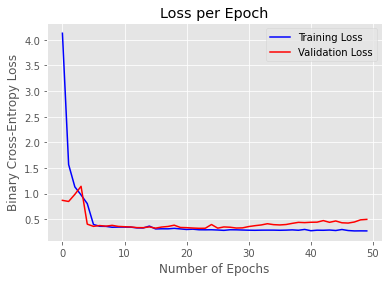

In [36]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

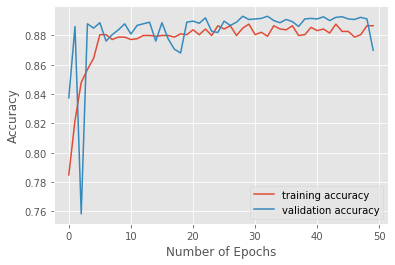

In [37]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
from sklearn import svm

svm_y = np.empty((len(features),1))

for i in range(len(features)):
    if features.iloc[i] == 1:
        svm_y[i] = 1
    else:
        svm_y[i] = -1

svm_y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(feat,svm_y, test_size = 0.6, shuffle=True)


clf = svm.SVC()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8838495575221239
0.8853667526723185
